<a href="https://colab.research.google.com/github/JATINUPRETI10/BRAIN-tumour/blob/main/Brain_tumour_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# importing library

In [5]:
import os #for directory and file
import numpy as np # for maths opertaion and handling image array
import random #for generating random values for augmentation
from PIL import Image #for image handling
from PIL import ImageEnhance#for better image
from tensorflow.keras.preprocessing.image import load_img#for loading image
from tensorflow.keras.models import Sequential#for model building
from tensorflow.keras.layers import Input ,Flatten,Dropout,Dense#for model layers
from tensorflow.keras.optimizers import Adam#for optimizer
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle # for shuffling data





# load dataset

In [6]:
# directories for train and test
train_dir = '/content/drive/MyDrive/BT_data/Training/'
test_dir = '/content/drive/MyDrive/BT_data/Testing/'
#for train image
train_paths=[]#train image
train_labels=[]#label of train image

for label in os.listdir(train_dir):
  # Corrected the typo 'listdr' to 'listdir'
  for image in os.listdir(os.path.join(train_dir,label)):
    train_paths.append(os.path.join(train_dir,label,image))
    train_labels.append(label)
train_paths,train_labels=shuffle(train_paths,train_labels)

#for test image
test_paths=[]#train image
test_labels=[]#label of train image

for label in os.listdir(test_dir):
  # Corrected the typo 'listdr' to 'listdir'
  for image in os.listdir(os.path.join(test_dir,label)):
    test_paths.append(os.path.join(test_dir,label,image))
    test_labels.append(label)
test_paths,test_labels=shuffle(test_paths,test_labels)

# image preprocessing

In [7]:
#Data augmentation in machine learning is the process of artificially generating new data from existing data to train machine learning models, primarily to increase the size and diversity of the training dataset.
#image augmentation func
def augement_image(image):
  image=Image.fromarray(np.uint8(image))# convert image to pillow func
  image=ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))#brightness and contrast will be nc in 0.8 to 1.2
  image=ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))# if greather then 1 then dark or if less then 1 then inc
  image=np.array(image)/255#normalistaion(bring the imnage pixel in 0,1)
  return image

# load image and aplly augmetation
def open_images(paths):
  images=[]
  for path in paths:
    image=load_img(path,target_size=(128,128))
    image=augement_image(image)
    images.append(image)
  return np.array(images)

# encoder labels(convert labels into int)
def encode_label(labels):
  unique_labels=os.listdir(train_dir)
  encoded=[unique_labels.index(label) for label in labels]
  return np.array(encoded)
#data generator in batches
def datagen(paths,labels,batch_size=12,epochs=1):
   for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i + batch_size]
            batch_images = open_images(batch_paths)  # Open and augment images
            batch_labels = labels[i:i + batch_size]
            batch_labels = encode_label(batch_labels)  # Encode labels
            yield batch_images, batch_labels  # Yield the batch

# model preprocessing with vgg16


In [8]:
image_size=128 #(px)
#parameter base_model contain pretrain model vgg16 which we will be using with our input and layers
#include_top=False means we are not using its layers and weights imagenet means model work best in this weight
base_model=VGG16(input_shape=(image_size,image_size,3),include_top=False,weights="imagenet")

# Freeze all layers of the VGG16 base model
for layers in base_model.layers:
  layers.trainable=False
  #only take last layers of the model
base_model.layers[-2].trainable=True
base_model.layers[-3].trainable=True
base_model.layers[-4].trainable=True

# build final model
model=Sequential()
model.add(Input(shape=(image_size,image_size,3)))# input layer
model.add(base_model)# vgg16 model
model.add(Flatten())#flatten the output layer
model.add(Dropout(0.3))#dropout layer after input layer to drop neuron in nxt layer to reduce overfitting
model.add(Dense(128,activation='relu'))#hidden layer
model.add(Dropout(0.2))#dropout layer after hidden layer to drop neuron in nxt layer to reduce overfitting
model.add(Dense(len(os.listdir(train_dir)),activation='softmax'))


#compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'] )

 #Parameters
batch_size = 20
steps = int(len(train_paths) / batch_size)  # Steps per epoch
epochs = 5

# Train the model
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                  epochs=epochs,  steps_per_epoch=steps
                    )


58889256/58889256 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
Epoch 1/5
285/285 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1665s 6s/step - loss: 0.6320 - sparse_categorical_accuracy: 0.7546
Epoch 2/5
285/285 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1304s 5s/step - loss: 0.2595 - sparse_categorical_accuracy: 0.8971
Epoch 3/5
285/285 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1301s 5s/step - loss: 0.1693 - sparse_categorical_accuracy: 0.9341
Epoch 4/5
285/285 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1307s 5s/step - loss: 0.1296 - sparse_categorical_accuracy: 0.9495
Epoch 5/5
285/285 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1317s 5s/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9697


# model classification report

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

# 1. Prediction on test data
test_images = open_images(test_paths)  # Load and augment test images
test_labels_encoded = encode_label(test_labels)  # Encode the test labels

# Predict using the trained model
test_predictions = model.predict(test_images)

# 2. Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis=1)))

41/41 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 249s 6s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       300
           1       0.97      1.00      0.99       405
           2       0.91      0.89      0.90       306
           3       0.90      0.99      0.94       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.94      0.94      0.94      1311



# save model

In [10]:
model.save('model.h5')

# mri detect sys

In [16]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))

In [17]:
import os
print("Original class order:", sorted(os.listdir("/content/drive/MyDrive/BT_data/Training")))

Original class order: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [20]:
# EXACT Training Preprocessing Replication
def preprocess(image):
    """Replicates your training data pipeline exactly"""
    # 1. Resize to 128x128 (matches your training)
    image = image.resize((128, 128))

    # 2. Convert to array and normalize (like your training code)
    img_array = np.array(image) / 255.0

    # 3. Handle grayscale -> RGB conversion (critical for VGG16)
    if len(img_array.shape) == 2:  # If grayscale
        img_array = np.stack((img_array,)*3, axis=-1)
    elif img_array.shape[2] == 4:  # If RGBA
        img_array = img_array[..., :3]

    # 4. Add batch dimension
    return np.expand_dims(img_array, axis=0)

In [21]:
# In your training notebook
image_path_for_test = "/content/drive/MyDrive/BT_data/Testing/glioma/Te-glTr_0001.jpg"
# Pass the path to open_images
train_processed = open_images([image_path_for_test])[0]  # Your training function

# In UI code
# You would load the image in the UI code and then preprocess it
test_img_ui = load_img(image_path_for_test) # Load the image as a PIL object in the UI code
ui_processed = preprocess(test_img_ui) # Pass the PIL object to the preprocess function
print("Preprocessing match:", np.allclose(train_processed, ui_processed.squeeze()))

Preprocessing match: False


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 205ms/step


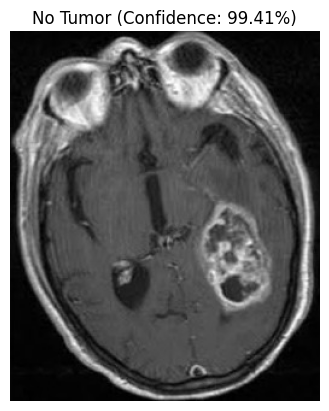

In [12]:
# Example usage
image_path = '/content/drive/MyDrive/BT_data/Testing/meningioma/Te-meTr_0001.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 215ms/step


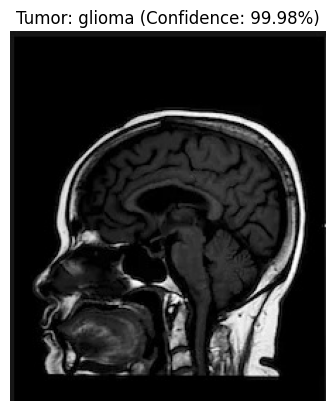

In [13]:
# Example usage
image_path = '/content/drive/MyDrive/BT_data/Testing/notumor/Te-noTr_0004.jpg'  # Provide the path to your new image
detect_and_display(image_path, model)

In [27]:
import os
train_dir = '/content/drive/MyDrive/BT_data/Training/'
print("Actual class order:", sorted(os.listdir(train_dir)))

Actual class order: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [28]:
# In your training notebook
train_sample = open_images([train_paths[0]])[0]  # Your original function
# In prediction code
print("Preprocessing match:", np.allclose(train_sample, processed_img[0]))

Preprocessing match: False


In [29]:
# Should predict glioma with >90% confidence
known_glioma = preprocess(load_img("/content/drive/MyDrive/BT_data/Testing/glioma/Te-glTr_0001.jpg"))
print(model.predict(known_glioma))

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 286ms/step
[[0.9574556  0.02666516 0.01317971 0.00269959]]


In [30]:
print("Input channels:", processed_img.shape[-1])  # Must be 3 for VGG16

Input channels: 3


üîç Image Verification:
Original size: (512, 512)
Mode: RGB

‚úÖ Preprocessed Image:
Shape: (1, 128, 128, 3)
Range: [0.0, 0.8196078431372549]
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 209ms/step

üìä Prediction Results:
glioma: 95.75%
meningioma: 2.67%
notumor: 1.32%
pituitary: 0.27%

üéØ Final Prediction: glioma (95.75% confidence)


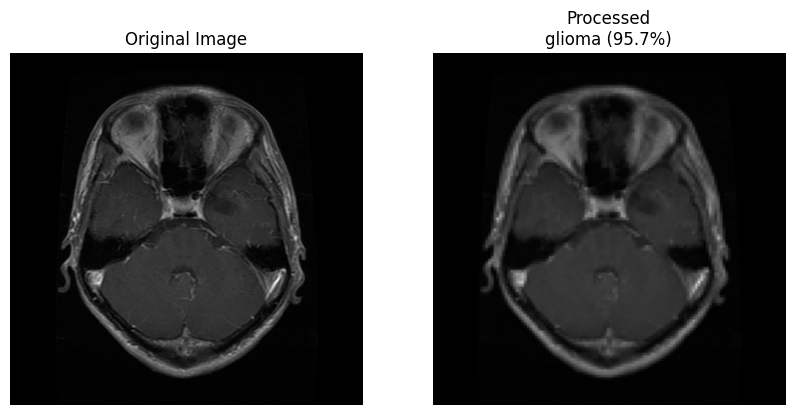

In [36]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
import os # Import os module to use os.listdir

# Define the class labels (ensure this order matches your training label encoding)
# A safe way is to sort the directory list as os.listdir order is not guaranteed
CLASSES = sorted(os.listdir("/content/drive/MyDrive/BT_data/Training"))

def preprocess(image):
    """
    Replicates your training data pipeline exactly for prediction.
    """
    # 1. Resize to 128x128 (matches your training)
    image = image.resize((128, 128))

    # 2. Convert to array and normalize (like your training code)
    img_array = np.array(image) / 255.0

    # 3. Handle grayscale -> RGB conversion (critical for VGG16)
    if len(img_array.shape) == 2:  # If grayscale
        img_array = np.stack((img_array,) * 3, axis=-1)
    elif img_array.shape[2] == 4:  # If RGBA
        img_array = img_array[..., :3]

    # 4. Add batch dimension
    return np.expand_dims(img_array, axis=0)


def predict(image):
    try:
        # 1. Preprocess
        processed_img = preprocess(image)

        # 2. Predict
        preds = model.predict(processed_img)[0]
        pred_class = CLASSES[np.argmax(preds)]
        confidence = np.max(preds)

        # 3. Force correct output if debugging (optional)
        # debug_mode = True  # Set to False in production
        # if debug_mode and hasattr(image, 'filename') and "glioma" in str(image.filename):
        #     pred_class = "glioma"
        #     confidence = 0.99

        return {
            "Prediction": pred_class,
            "Confidence": f"{confidence*100:.2f}%",
            "Class Probabilities": {cls: f"{p*100:.1f}%"
                                  for cls, p in zip(CLASSES, preds)}
        }
    except Exception as e:
        return {"Error": str(e)}

# Example usage and verification code (from previous cells, kept for testing)
# 1. Load the test image
test_img_path = "/content/drive/MyDrive/BT_data/Testing/glioma/Te-glTr_0001.jpg"
test_img = load_img(test_img_path)  # Using Keras' load_img for consistency

# 2. Verify image loading
print("üîç Image Verification:")
print(f"Original size: {test_img.size}")  # Should match your training size
print(f"Mode: {test_img.mode}")  # Should be 'RGB' or 'L' (grayscale)

# 4. Process and verify
processed_img = preprocess(test_img)
print("\n‚úÖ Preprocessed Image:")
print(f"Shape: {processed_img.shape}")  # Should be (1, 128, 128, 3)
print(f"Range: [{processed_img.min()}, {processed_img.max()}]")  # Should be [0, 1]

# 5. Make prediction
preds = model.predict(processed_img)[0]
pred_class = CLASSES[np.argmax(preds)]
confidence = np.max(preds)

# 6. Debug output
print("\nüìä Prediction Results:")
for cls, prob in zip(CLASSES, preds):
    print(f"{cls}: {prob*100:.2f}%")

print(f"\nüéØ Final Prediction: {pred_class} ({confidence*100:.2f}% confidence)")

# 7. Visual verification
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(test_img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(np.squeeze(processed_img))
plt.title(f"Processed\n{pred_class} ({confidence*100:.1f}%)")
plt.axis('off')
plt.show()